## Data Science Intern at LetsGrowMore for December 2021

## Author :- Dhaval Sunil Tharkar

## Task :- 2.2) Prediction using Decision Tree  Algorithm

## Level :- Beginner

## Language :- Python


### Prediction using Decision Tree  Algorithm :

Create the Decision Tree classifier and visualize it graphically. 

The purpose is if we feed any new data to this classifier, it would be able to  predict the right class accordingly.  

Dataset : https://bit.ly/3kXTdox

# Importing Required Libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix 

import warnings; warnings.filterwarnings('ignore')
%matplotlib inline

# Reading the Dataset using read_csv()

Read the csv file of iris dataset and store it into the variable name called data

In [2]:
data = pd.read_csv('iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# Exploratory Data Analysis EDA on the dataset variable data

In [3]:
data.head() # Shows the first five rows of the data from variable data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.tail() # Shows the last five rows of the data from variable data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
data.rename(columns={'SepalLengthCm':'SepalLength', 'SepalWidthCm':'SepalWidth','PetalLengthCm':'PetalLength','PetalWidthCm':'PetalWidth'}, inplace=True)
# renaming the column name SepalLengthCm as SepalLength , SepalWidthCm as SepalWidth , PetalLengthCm as PetalLength , PetalWidthCm as PetalWidth

In [6]:
data['Species'].replace({'Iris-virginica':'virginica','Iris-setosa':'setosa','Iris-versicolor':'versicolor'},inplace=True)
# replacing the Iris-virginica by  virginica into the Species Column
# replacing the Iris-setosa by setosa into the Species Column
# replacing the Iris-versicolor by  versicolor into the Species Column

In [7]:
data = data.drop("Id", axis=1)
# As the Id column in the iris dataset resembles to the serial number of the rows inserted as it is not necessary for prediction 
# we asre droping the Id column  from the data set

In [8]:
data.shape # shows the shape of the data variable in tuple format
# variable_name(number of rows, number of columns)

(150, 5)

In [9]:
data.info() # Print the summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
data.describe() 
# shows the Statistical details like count, mean,standard deviation, minimum value, quartile 1 i.e. 25 %, quartile 2 i.e. median or 50 %, quartile 3 i.e. 75%, maximum value 

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
data.isna().sum() # Checks whether the dataset contains any null value or not 
# isna().sum() will give the sum of the null values present in the dataset

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64

### Data Visualization 

<AxesSubplot:>

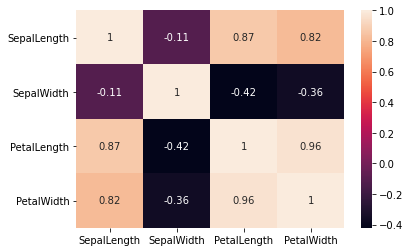

In [12]:
sns.heatmap(data.corr(),annot=True)

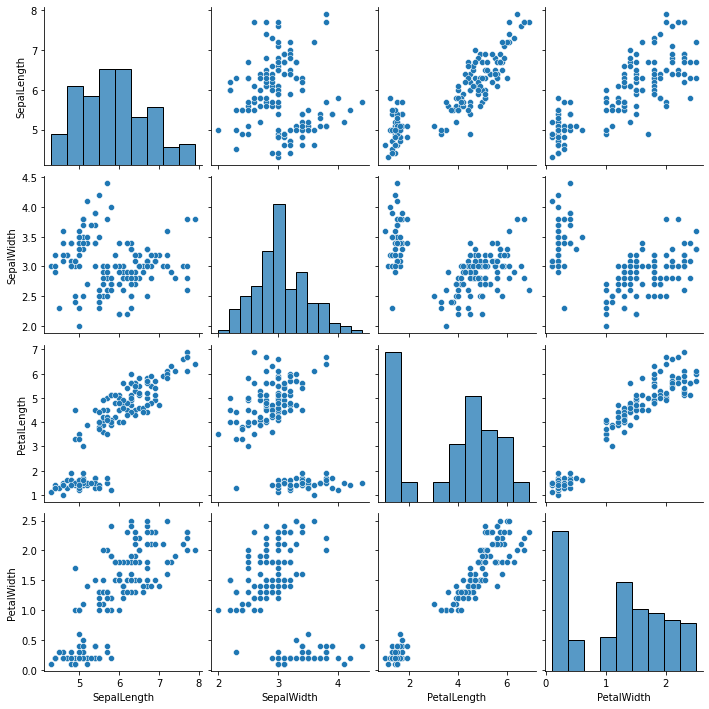

In [13]:
sns.pairplot(data)

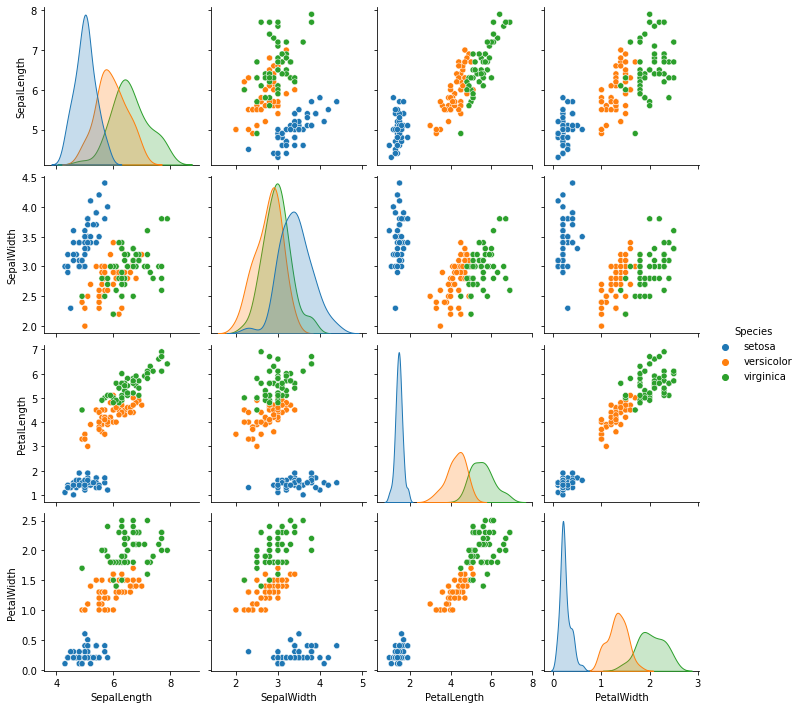

In [14]:
sns.pairplot(data,hue='Species')
# blue color represents the setosa
# orange color represents the versicolor
# green color represeents the virginica

array([[<AxesSubplot:title={'center':'SepalLength'}>,
        <AxesSubplot:title={'center':'SepalWidth'}>],
       [<AxesSubplot:title={'center':'PetalLength'}>,
        <AxesSubplot:title={'center':'PetalWidth'}>]], dtype=object)

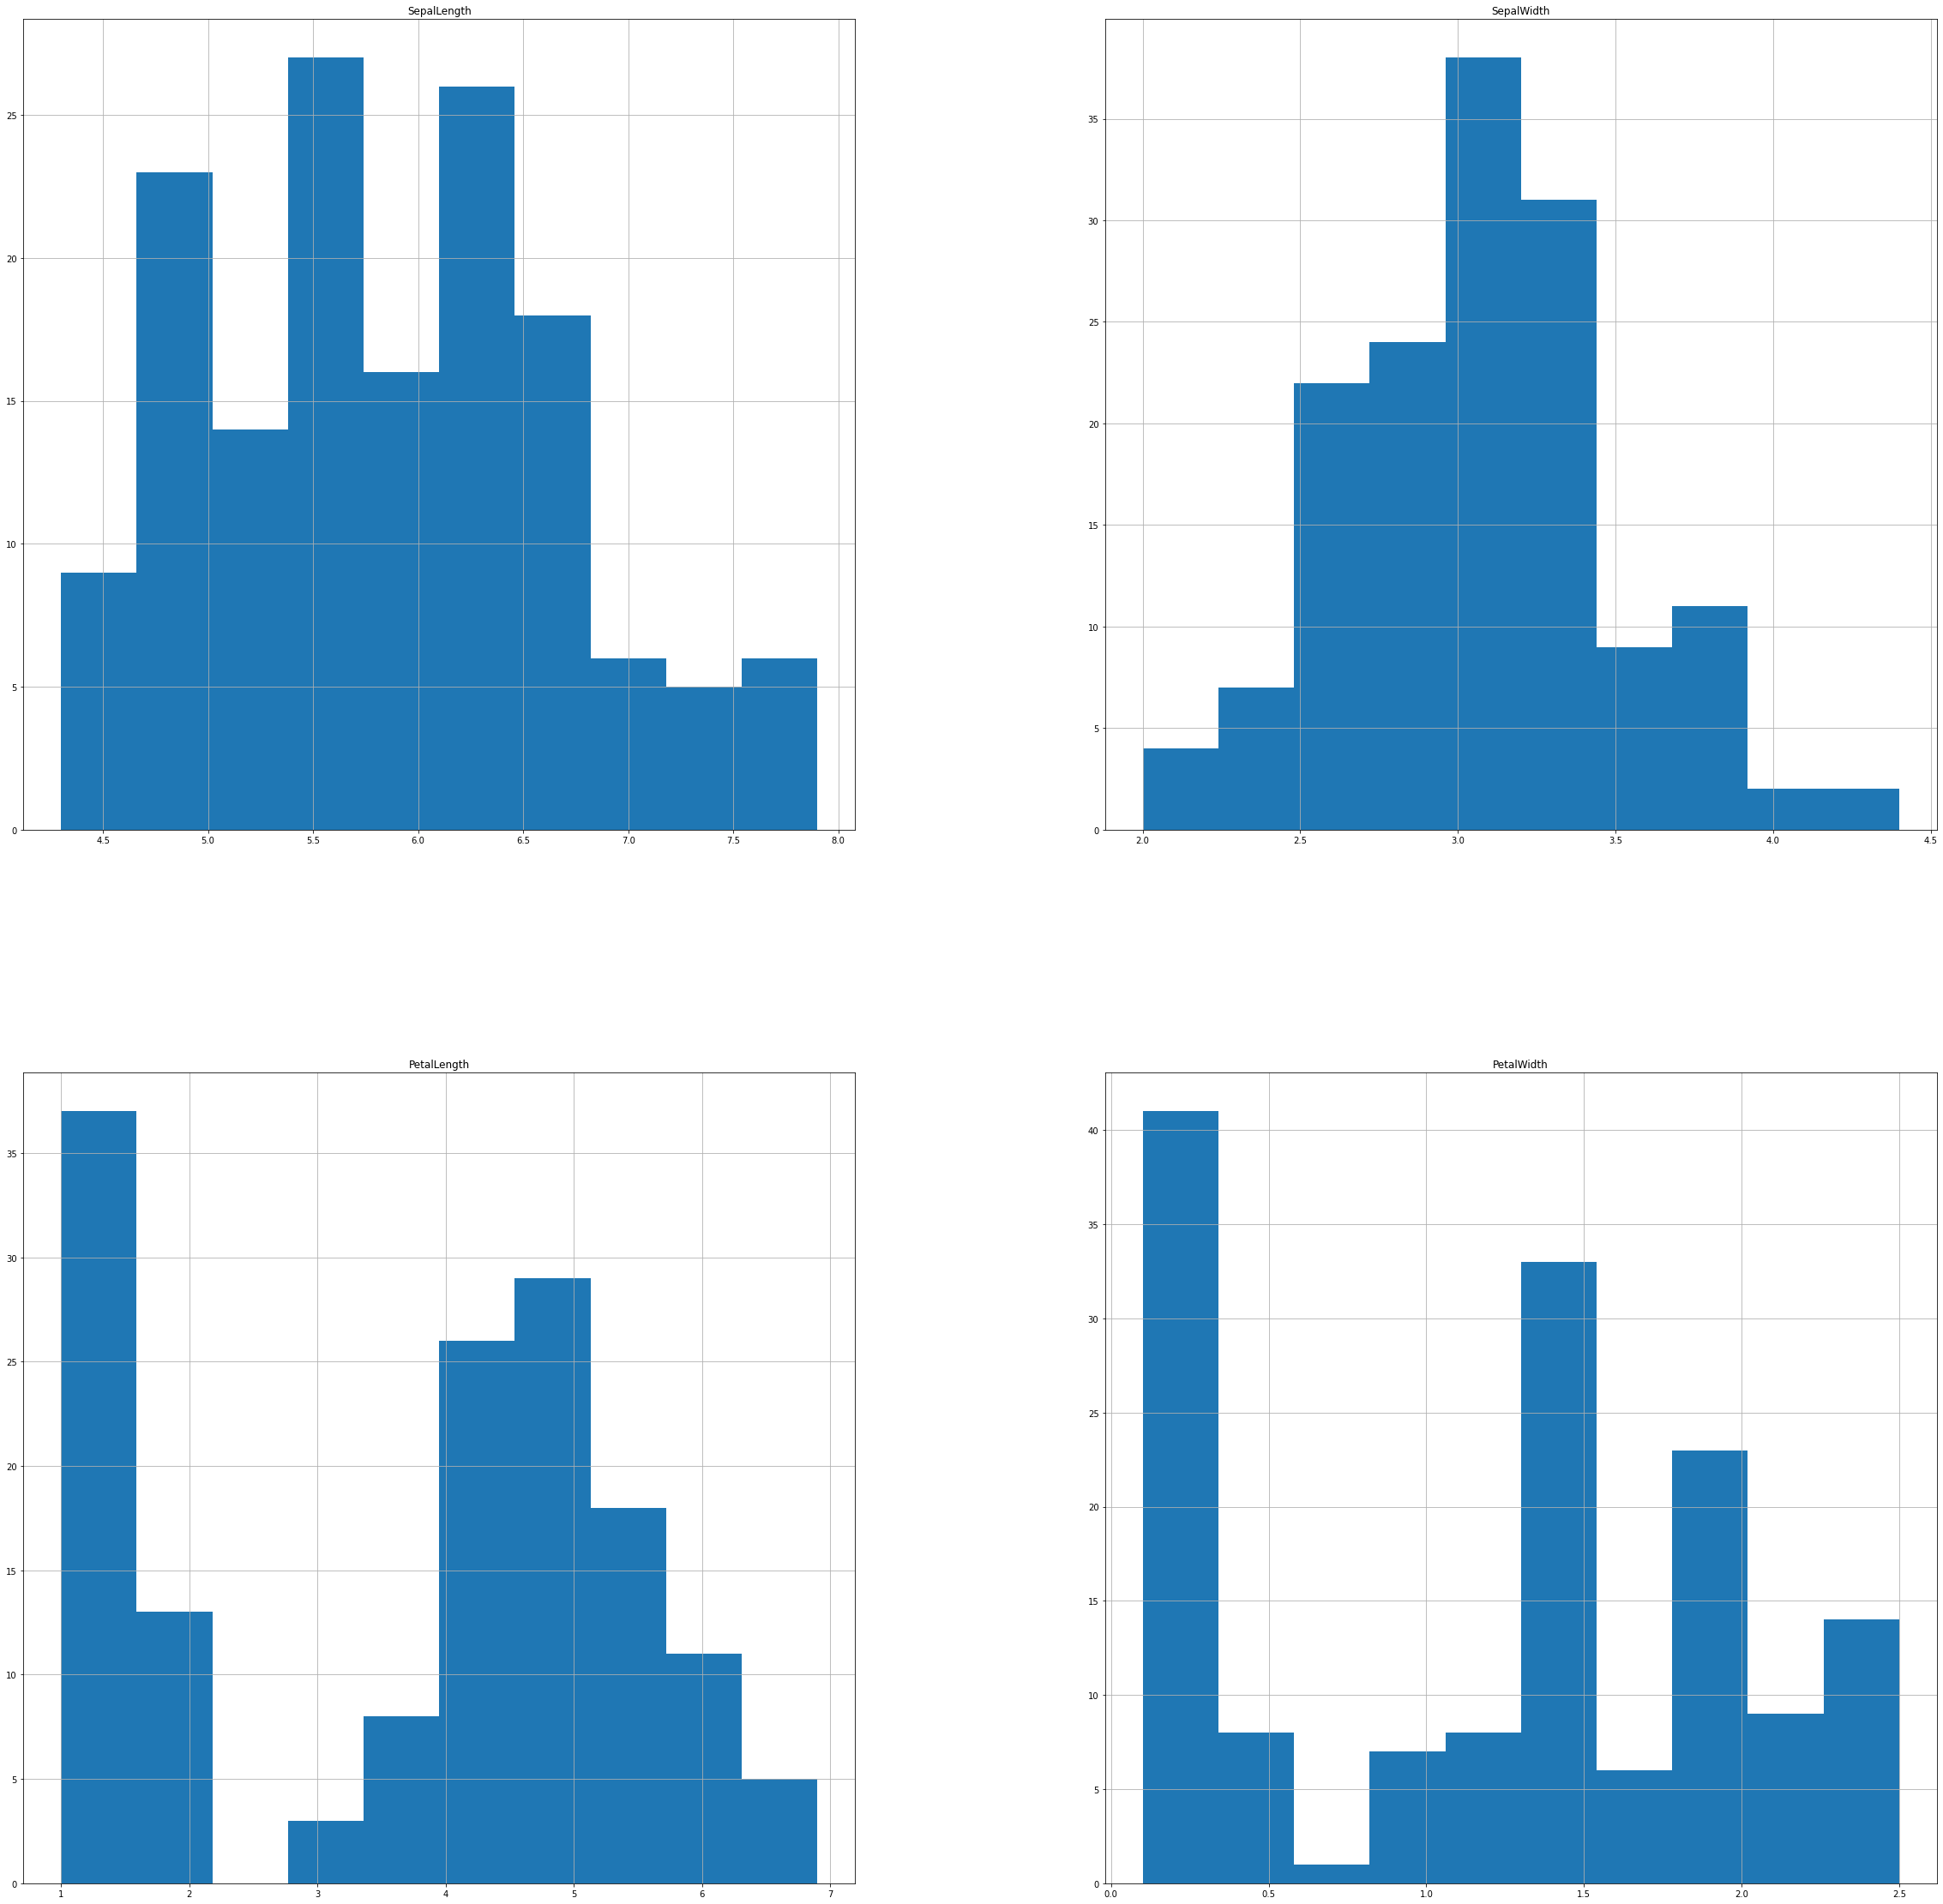

In [15]:
# creating histograms to visualize all the data
fig = plt.figure(figsize = (40,40))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax = fig.gca()
data.hist(ax = ax)

In [16]:
pd.DataFrame(data.Species).value_counts()
# Count of Setosa as 50
# Count of Verginica as 50
# Count of Versicolor as 50

Species   
setosa        50
versicolor    50
virginica     50
dtype: int64

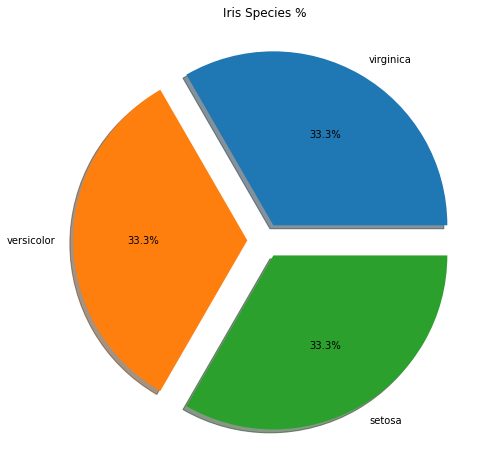

In [17]:
ax=plt.subplots(1,1,figsize=(10,8))
data['Species'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.title("Iris Species %")
plt.ylabel('   ')
plt.show()

In [18]:
data['Species'].unique() # Displays the Unique Value into the column of Species in the dataset

array(['setosa', 'versicolor', 'virginica'], dtype=object)

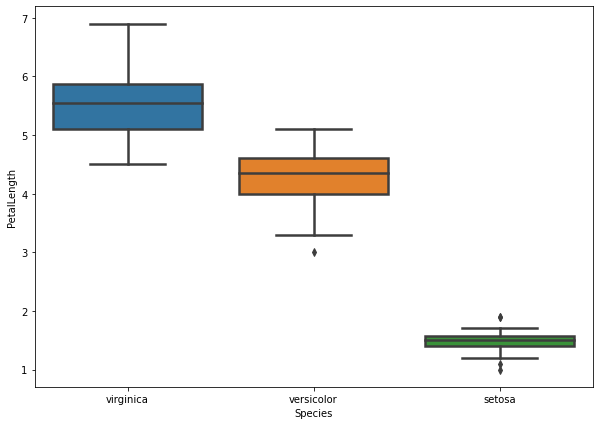

In [19]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.boxplot(x='Species',y='PetalLength',data=data,order=['virginica', 'versicolor', 'setosa'],linewidth=2.5,orient='v',dodge=False)

## Spliting the dataset as independent variable X and dependent variable y

In [20]:
X=data.iloc[:,[0,1,2,3]]
y=data.Species

In [21]:
X.shape

(150, 4)

In [22]:
y.shape

(150,)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

In [24]:
X_train.shape

(120, 4)

In [25]:
y_train.shape

(120,)

In [26]:
X_test.shape

(30, 4)

In [27]:
y_test.shape

(30,)

## Making a Decision tree on iris dataset

In [28]:
from sklearn.tree import DecisionTreeClassifier
task6_clf = DecisionTreeClassifier(criterion='entropy')
task6_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [29]:
y_pred_train = task6_clf.predict(X_train)
y_pred_test = task6_clf.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_test)

0.9666666666666667

In [31]:
accuracy_score(y_train, y_pred_train)

1.0

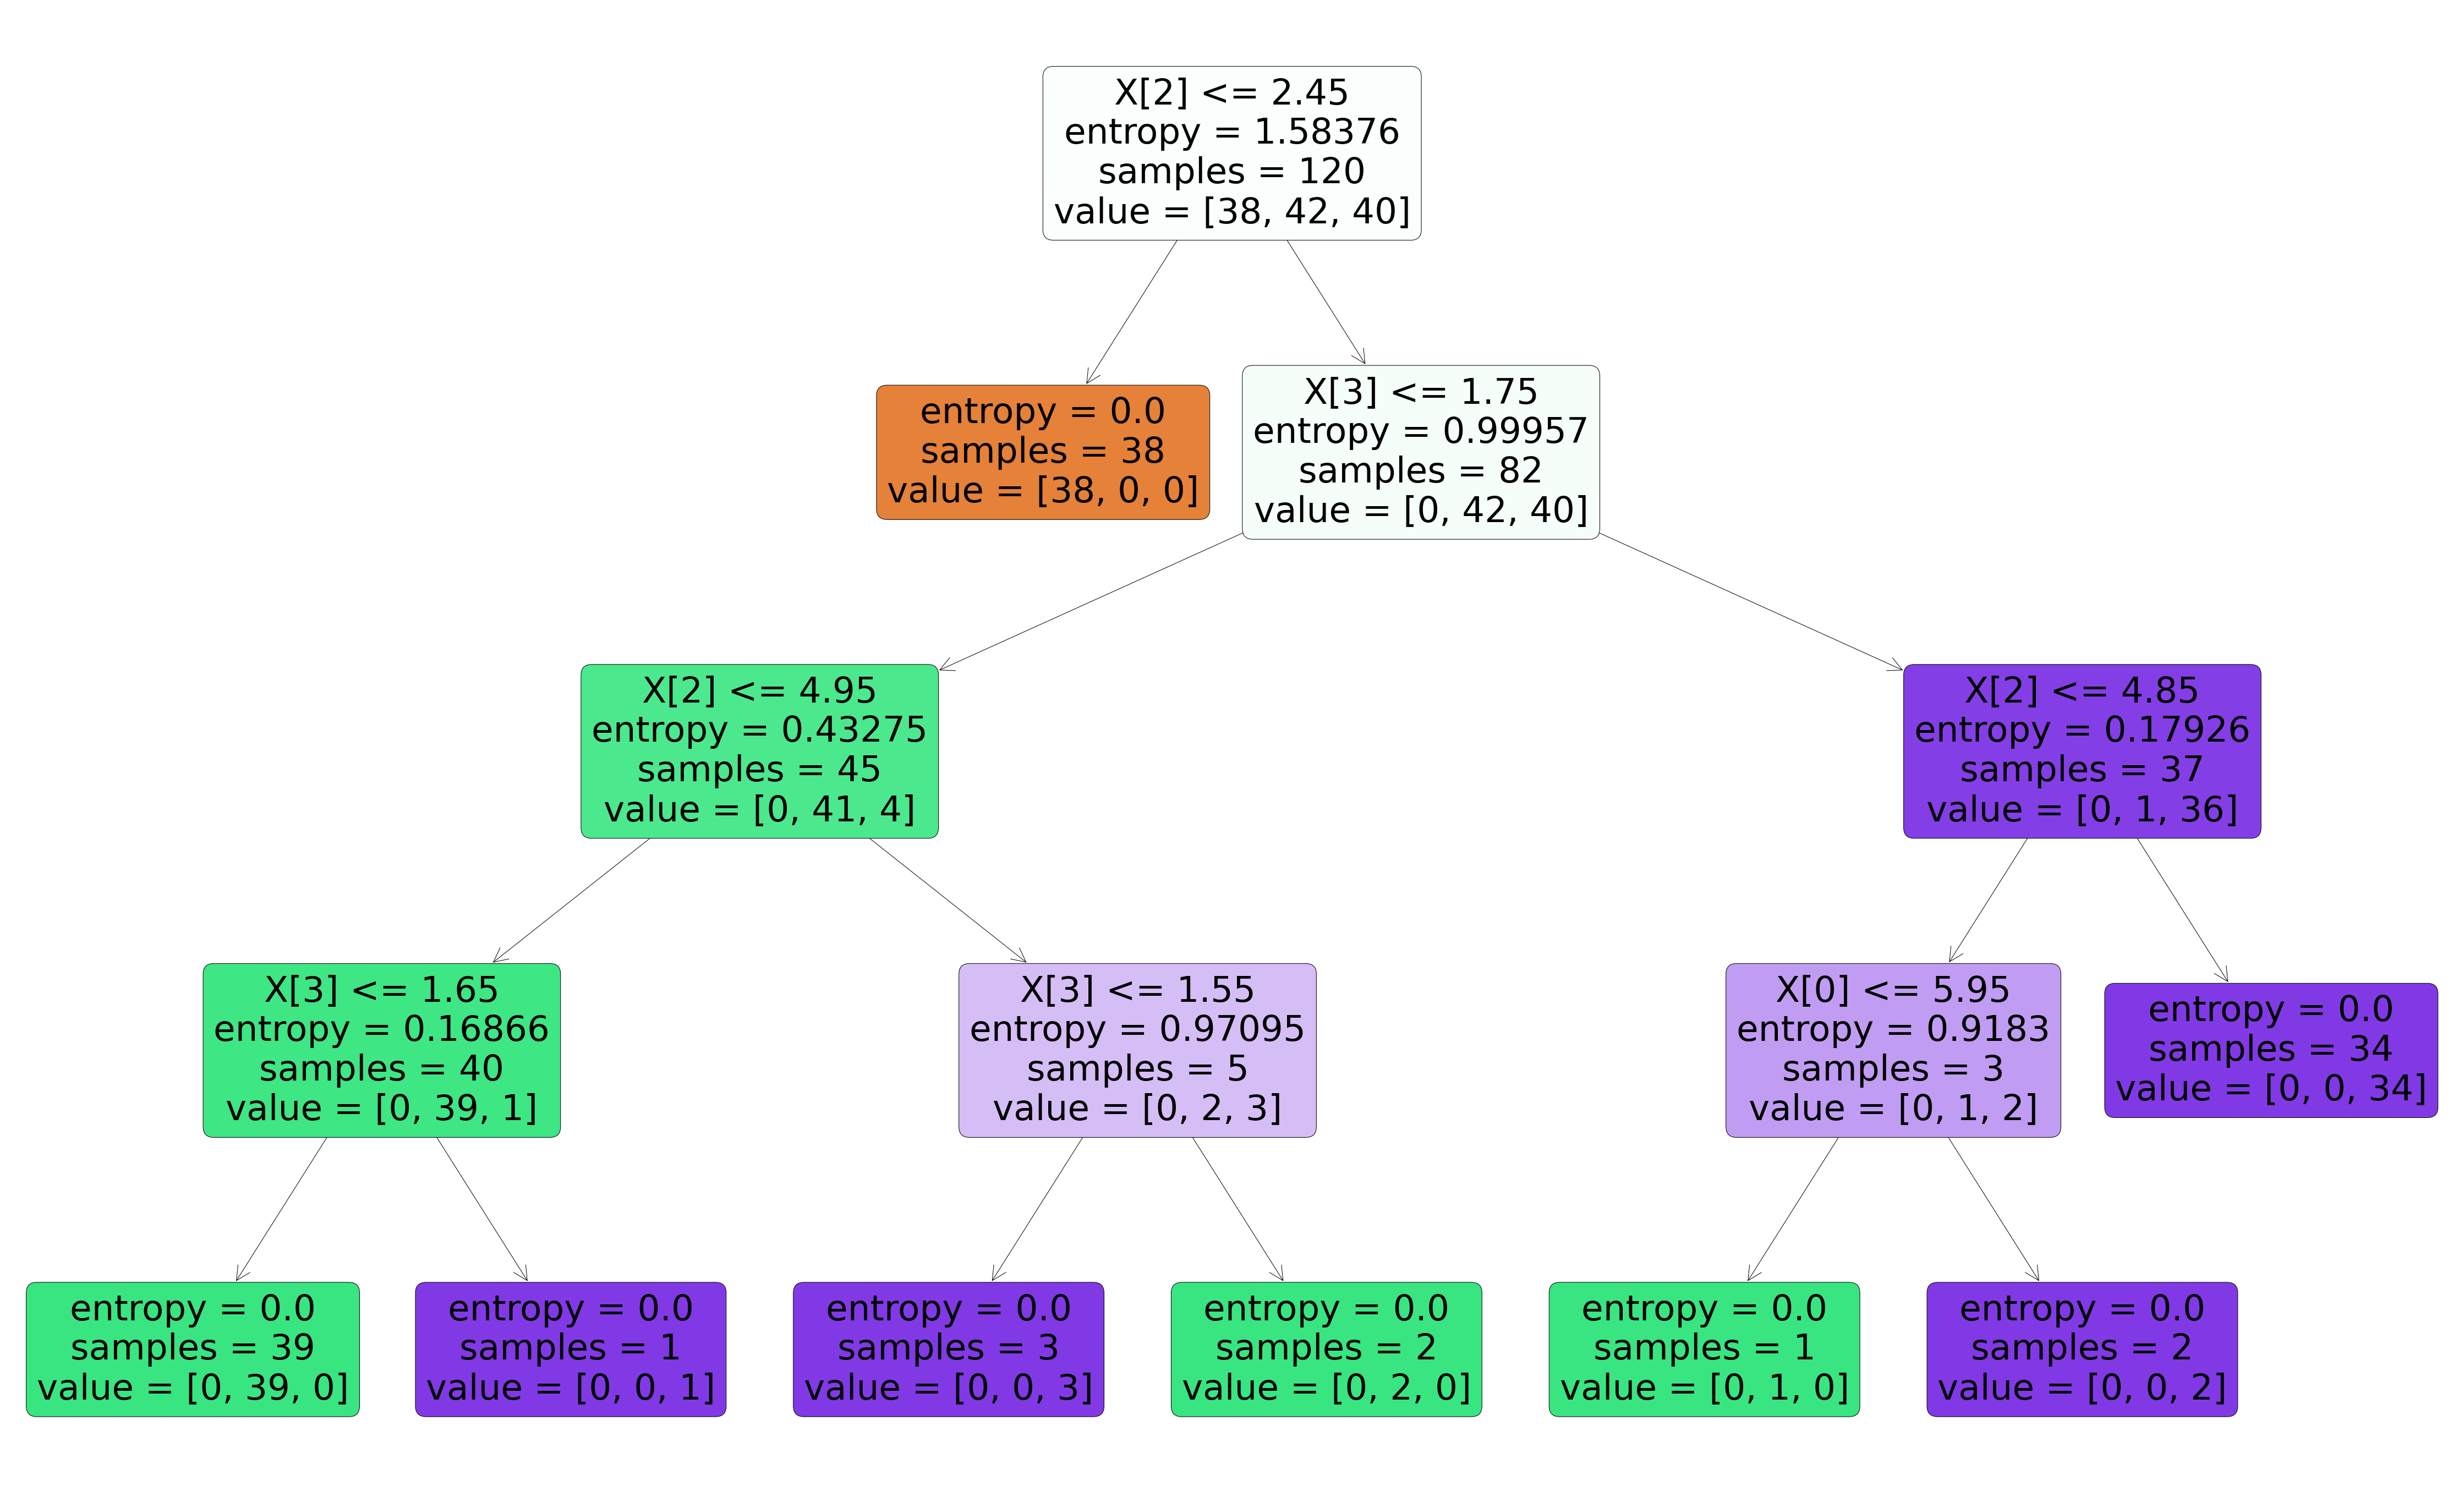

In [32]:
from sklearn.tree import plot_tree
from matplotlib.pyplot import rcParams

rcParams['figure.figsize'] = 80, 50
plot_tree(task6_clf,precision=5,rounded=True,filled=True);